# RandomForest (Zufallswald)

In [1]:
from sklearn.datasets import load_digits 

from sklearn.ensemble import RandomForestClassifier 

import pandas as pd 

import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 

import seaborn as sn

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_7124\611174149.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load the data

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

# Build a dataframe from digits

In [4]:
df = pd.DataFrame(digits.data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
# attach the target to the dataframe
df["target"] = digits.target
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


In [6]:
df.to_csv("./digits.csv", index = False)

# Split the Data

In [7]:
# 1. Split into input and output
X = df.drop("target", axis = "columns")
y = df.target 

# 2. Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state= 40)




# Build and train the model

In [8]:
model = RandomForestClassifier( n_estimators= 30,random_state=40) 
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=40)

In [9]:
model2 = RandomForestClassifier( n_estimators= 50,random_state=40) 
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=40)

In [10]:
model3 = RandomForestClassifier( n_estimators= 100,random_state=40) 
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [11]:
model4 = RandomForestClassifier( n_estimators= 150,random_state=40) 
model4.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=40)

In [14]:
model5 = RandomForestClassifier( n_estimators= 300,random_state=40) 
model5.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=40)

# Scoring

In [15]:
print(model.score(X_test, y_test))
print(model2.score(X_test, y_test))
print(model3.score(X_test, y_test))
print(model4.score(X_test, y_test))
print(model5.score(X_test, y_test))

0.9611111111111111
0.9722222222222222
0.975
0.975
0.975


# Confusion Matrix

In [16]:
y_predicted = model5.predict(X_test)

In [17]:
cm = confusion_matrix(y_test , y_predicted )

Text(50.722222222222214, 0.5, 'Truth')

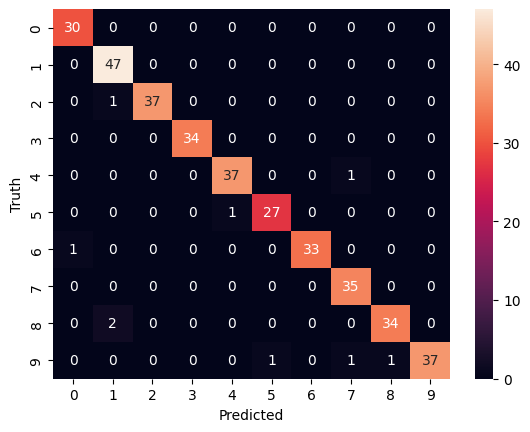

In [18]:
sn.heatmap(cm ,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")